In [20]:
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [5]:
fod = pd.read_csv('../data/Food/food_clean.csv')
soy = pd.read_csv('../data/Soy/soy_clean.csv')
oil_prod = pd.read_csv('../data/Palm/oil_prod_clean.csv')
oil_yield = pd.read_csv('../data/Palm/oil_yield_clean.csv')
pop = pd.read_csv('../data/Population/population_clean.csv')

In [6]:
# Agrupar los datos filtrados por año y sumar el Feed para cada año y país
agregado = df_top_countries.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

# Crear subplots con una sola fila y una columna
fig = make_subplots(rows=1, cols=1)

# Añadir las barras apiladas al subplot
for pais in agregado.columns:
    fig.add_trace(go.Bar(x=agregado.index, y=agregado[pais], name=pais), 1, 1)

# Establecer el título y las etiquetas de los ejes
fig.update_layout(title='Total de Feed por año para los 10 países con más número en Feed',
                  xaxis_title='Año',
                  yaxis_title='Total de Feed')

# Mostrar el gráfico
fig.show()

NameError: name 'df_top_countries' is not defined

In [9]:
agregado = soy.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

top_continents = soy.groupby('Entity')['Feed'].sum().nlargest(5).index

# Filtrar los datos para incluir solo los continentes seleccionados
df_top_continents = soy[soy['Entity'].isin(top_continents)]

# Agrupar los datos filtrados por 'Year' y 'Entity' y sumar el 'Feed'
agregado = df_top_continents.groupby(['Year', 'Entity'])['Feed'].sum().unstack()

# Crear subplots con una sola fila y una columna
fig = make_subplots(rows=1, cols=1)

# Añadir las barras apiladas al subplot
for continente in agregado.columns:
    fig.add_trace(go.Bar(x=agregado.index, y=agregado[continente], name=continente), 1, 1)

# Establecer el título y las etiquetas de los ejes
fig.update_layout(title='Total de Feed por año para los cinco continentes',
                  xaxis_title='Año',
                  yaxis_title='Total de Feed')

# Mostrar el gráfico
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


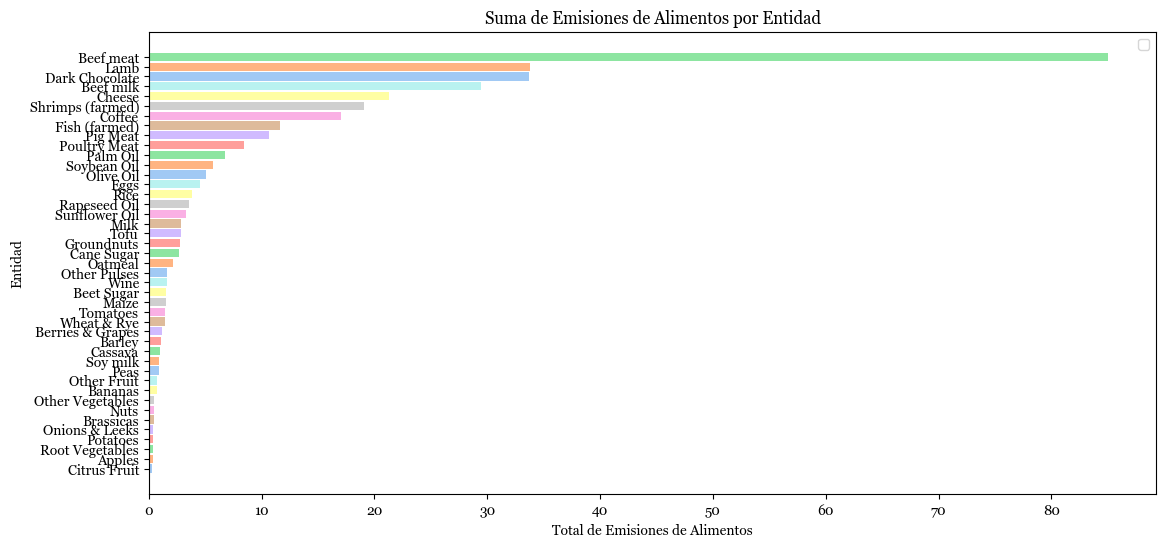

In [29]:
# Calcular la suma de las emisiones de alimentos para cada entidad
fod['Total_Food_Emissions'] = fod.iloc[:, 2:9].sum(axis=1)

df_sorted = fod.sort_values('Total_Food_Emissions', ascending=True)

colors = sns.color_palette('pastel')

# Crear el gráfico de barras horizontales
plt.figure(figsize=(13, 6))
plt.barh(df_sorted['Entity'], df_sorted['Total_Food_Emissions'], color=colors, height=0.85)
plt.xlabel('Total de Emisiones de Alimentos')
plt.ylabel('Entidad')
plt.title('Suma de Emisiones de Alimentos por Entidad')

plt.legend(loc='upper right', labelspacing=2, prop={'size': 10})

plt.rcParams['font.family'] = 'Georgia'

plt.show()

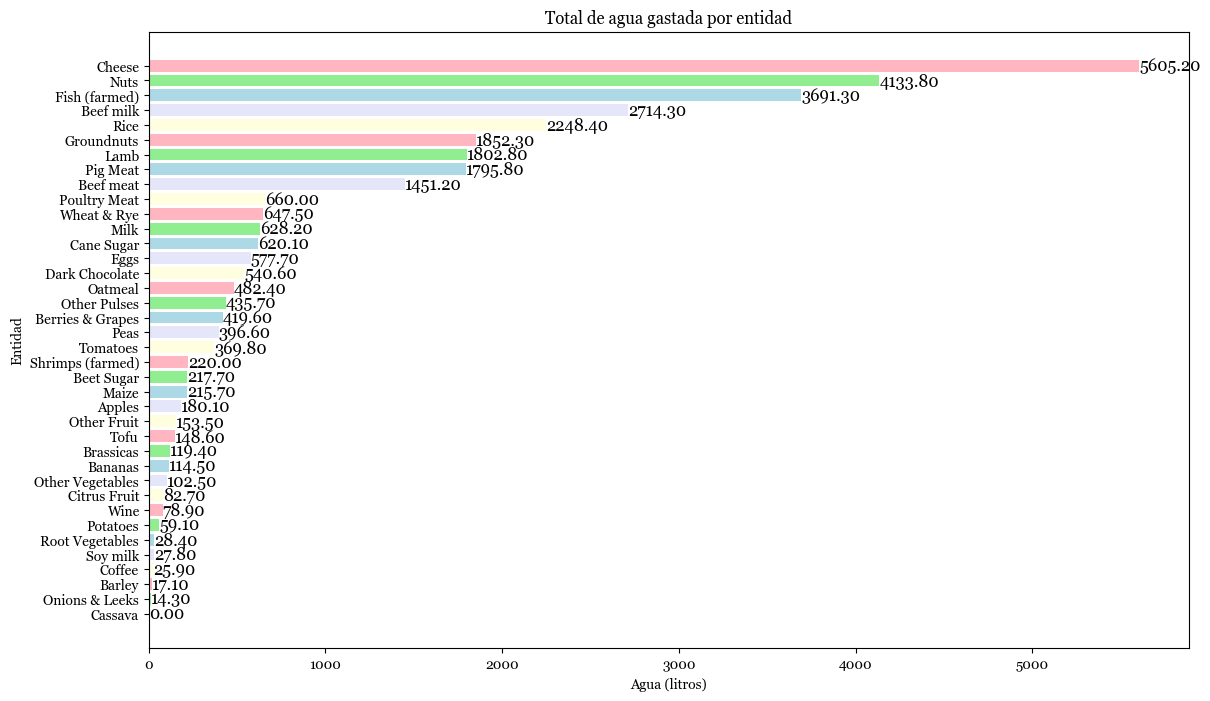

In [33]:
# Crear el gráfico de barras horizontales

df_cleaned = fod.dropna(subset=['Water_l_kg'])

df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=True)

colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

plt.figure(figsize=(16, 8))
bars = plt.barh(df_sorted['Entity'], df_sorted['Water_l_kg'], color=colors)
# Añadir etiquetas a las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
             ha='left', va='center', color='black', fontsize=12)

# Añadir título y etiquetas de los ejes
plt.title('Total de agua gastada por entidad')
plt.xlabel('Agua (litros)')
plt.ylabel('Entidad')

# Ajustar el espaciado de las etiquetas en el eje y
plt.subplots_adjust(left=0.25)

# Mostrar el gráfico
plt.show()

In [36]:
# Eliminar filas con valores nulos en la columna 'Water_l_kg'
df_cleaned = fod.dropna(subset=['Water_l_kg'])

# Ordenar los datos de mayor a menor
df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=True)

# Crear una paleta de colores pastel
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

# Crear el gráfico de barras horizontales utilizando Plotly
fig = px.bar(df_sorted, x='Water_l_kg', y='Entity', orientation='h', color='Entity', color_discrete_sequence=colors)

# Añadir etiquetas a las barras
fig.update_traces(texttemplate='%{x:.2f}', textposition='outside')

# Añadir título y etiquetas de los ejes
fig.update_layout(title='Total de agua gastada por entidad (Ordenado de mayor a menor)', xaxis_title='Agua (litros)', yaxis_title='Entidad')

# Ajustar el espaciado de las etiquetas en el eje y
fig.update_layout(yaxis=dict(autorange="reversed", automargin=True))

# Mostrar el gráfico
fig.show()


In [38]:
# Eliminar filas con valores nulos en la columna 'Water_l_kg'
df_cleaned = fod.dropna(subset=['Water_l_kg'])

# Ordenar los datos de mayor a menor
df_sorted = df_cleaned.sort_values('Water_l_kg', ascending=False)

# Crear una paleta de colores pastel
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightyellow', 'lavender']

# Crear la figura y los datos de las barras
fig = go.Figure()

for i, row in df_sorted.iterrows():
    entity = row['Entity']
    water = row['Water_l_kg']
    
    # Añadir una barra al gráfico para cada entidad
    fig.add_trace(go.Bar(
        x=[water],
        y=[entity],
        orientation='h',
        name=entity,
        marker=dict(color=colors[i % len(colors)])
    ))

# Configurar el diseño del gráfico
fig.update_layout(
    title='Total de agua gastada por entidad (Ordenado de mayor a menor)',
    xaxis_title='Agua (litros)',
    yaxis_title='Entidad',
    barmode='stack',
    height=500
)

# Habilitar la selección de entidades
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=['visible', [True] * len(df_sorted)],
                    label='Mostrar todas',
                    method='restyle'
                ),
                dict(
                    args=['visible', [True] * len(df_sorted)],
                    label='Mostrar ninguna',
                    method='restyle'
                )
            ]),
            direction='down',
            pad={'r': 10, 't': 10},
            showactive=True,
            x=0.1,
            xanchor='left',
            y=1.1,
            yanchor='top'
        )
    ]
)

# Actualizar la visibilidad de las entidades al seleccionar/deseleccionar
for i, row in df_sorted.iterrows():
    entity = row['Entity']
    fig.update_traces(visible=True if i < 5 else False, selector=dict(name=entity))

# Mostrar el gráfico
fig.show()

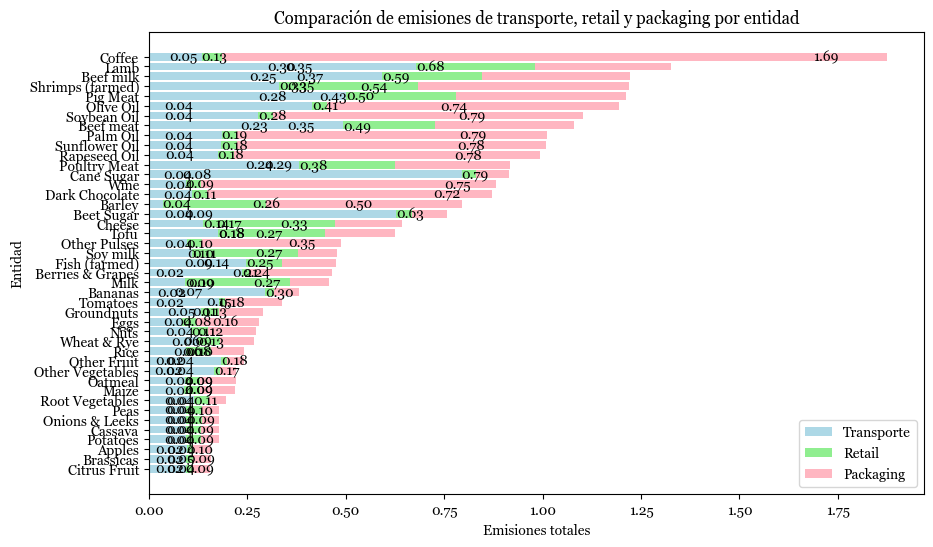

In [47]:
fod['Total_Food_Emissions_Transports'] = fod.iloc[:, 6:9].sum(axis=1)

df_filtered = fod[['Entity', 'food_emissions_transport', 'food_emissions_retail', 'food_emissions_packaging', 'Total_Food_Emissions_Transports']]

df_grouped = df_filtered.groupby('Entity').sum()
df_sorted = df_grouped.sort_values('Total_Food_Emissions_Transports', ascending=True)

# Crear la figura y los datos de las barras
fig, ax = plt.subplots(figsize=(10, 6))
entities = df_sorted.index
transport = df_sorted['food_emissions_transport']
retail = df_sorted['food_emissions_retail']
packaging = df_sorted['food_emissions_packaging']

# Crear las barras apiladas
bottom = None
bars = []
colors = ['lightblue', 'lightgreen', 'lightpink']
labels = ['Transporte', 'Retail', 'Packaging']

for i, data in enumerate([transport, retail, packaging]):
    bar = ax.barh(entities, data, color=colors[i], left=bottom)
    bars.append(bar)
    if bottom is None:
        bottom = data
    else:
        bottom += data

# Añadir etiquetas de valor a las barras
for bar in bars:
    for rect in bar:
        width = rect.get_width()
        if width > 0:
            ax.text(width, rect.get_y() + rect.get_height() / 2, '{:.2f}'.format(width),
                    ha='left', va='center', color='black', fontsize=10)

# Añadir leyenda
ax.legend(bars, labels, loc='lower right')

# Añadir título y etiquetas de los ejes
ax.set_title('Comparación de emisiones de transporte, retail y packaging por entidad')
ax.set_xlabel('Emisiones totales')
ax.set_ylabel('Entidad')

# Mostrar el gráfico
plt.show()



In [53]:
fod['Total_Food_Emissions_Transports'] = fod.iloc[:, 6:9].sum(axis=1)

df_filtered = fod[['Entity', 'food_emissions_transport', 'food_emissions_retail', 'food_emissions_packaging', 'Total_Food_Emissions_Transports']]

df_grouped = df_filtered.groupby('Entity').sum()
df_sorted = df_grouped.sort_values('Total_Food_Emissions_Transports', ascending=False)

entities = df_sorted.index
transport = df_sorted['food_emissions_transport']
retail = df_sorted['food_emissions_retail']
packaging = df_sorted['food_emissions_packaging']

# Crear las barras apiladas
fig = go.Figure()

fig.add_trace(go.Bar(y=entities, x=transport, name='Transporte', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=retail, name='Retail', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=packaging, name='Packaging', orientation='h'))

# Actualiza grafico 

def sort_entities(column_name):
    sorted_indices = df_grouped[column_name].sort_values(ascending=False).index
    return [entity for entity in entities if entity in sorted_indices]

# Diseño del gráfico
fig.update_layout(
    title='Comparación de emisiones de transporte, retail y packaging por entidad',
    xaxis_title='Emisiones totales',
    yaxis_title='Entidad',
    barmode='stack',
    bargap=0.2,
    legend=dict(
        x=1.05,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        itemclick='toggle',
        itemdoubleclick='toggleothers',
        traceorder='reversed'
    ),
)

# Mostrar el gráfico
fig.show()

In [58]:

# Ordenar el dataframe por la suma de las columnas 'food_emissions_land_use' y 'food_emissions_farm'
df_sorted = fod.sort_values(['food_emissions_land_use', 'food_emissions_farm'], ascending=False)

# Obtener los valores de las columnas
entities = df_sorted['Entity']
land_use = df_sorted['food_emissions_land_use']
farm = df_sorted['food_emissions_farm']

# Crear las barras apiladas
fig = go.Figure()
fig.add_trace(go.Bar(y=entities, x=land_use, name='Land Use', orientation='h'))
fig.add_trace(go.Bar(y=entities, x=farm, name='Farm', orientation='h'))

# Actualizar el diseño del gráfico
fig.update_layout(
    title='Comparación de emisiones de Land Use y Farm por entidad',
    xaxis_title='Emisiones totales',
    yaxis_title='Entidad',
    barmode='stack',
    bargap=0.2,
    legend=dict(
        x=1.05,
        y=0.5,
        bgcolor='rgba(255, 255, 255, 0.5)',
        itemclick='toggle',
        itemdoubleclick='toggleothers',
    ),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
)

# Definir la paleta de colores
colors = ['rgb(239, 154, 154)', 'rgb(144, 202, 249)']

# Asignar colores a las barras
for i, bar in enumerate(fig['data']):
    bar['marker']['color'] = colors[i % len(colors)]

# Crear leyenda con el nombre de las entidades
legend_text = [str(entity) for entity in entities]

for i, entity in enumerate(entities):
    fig.update_traces(name=str(entity), selector=dict(name=legend_text[i]))

# Mostrar el gráfico
fig.show()


